![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

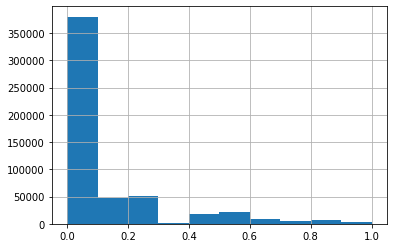

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [6]:
# drop numeric and alphanumeric rows
df.dropna(inplace=True)
df.drop(df[df.comment_text.str.contains('[0-9]')].index, inplace=True)

In [13]:
# # Separación de variable de interés (y)

y = df.target
y.describe()

count    412794.000000
mean          0.109384
std           0.204478
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [8]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [9]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [10]:
# Celda 1
vect_A = CountVectorizer(lowercase=False,dtype=np.int8,max_features=5000)
X_dtm_A = vect_A.fit_transform(X_train)
X_dtm_Test = vect_A.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_dtm_A, y_train)

predictions_test = rf.predict(X_dtm_Test)

print('Rmse: ', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))


Rmse:  0.1851211415058831


## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 2
vect_B = CountVectorizer(lowercase=False, ngram_range=(1,3),dtype=np.int8,max_features=5000)
X_dtm_B = vect_B.fit_transform(X_train)
X_dtm_Test = vect_B.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_dtm_B, y_train)

predictions_test = rf.predict(X_dtm_Test)

print('Rmse: ', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

Rmse:  0.19321299922878424


## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

El modelo Tfidfvectorizer es una implementación que calcula la frecuencia de términos y luego la frecuencia inversa de documentos (IDF) para llegar a los puntuajes Tf-idf que son una ponderación. Es recomendado usarlo cuando se necesiten los vectores de frecuencia de términos para diferentes tareas o cuando se necesiten calcular los puntuajes Tf-idf en documentos dentro del conjunto de datos. Si lo comparamos con countvectorizer, la principal diferencia es que countvectorizer solo proporciona la frecuencia de términos mientras que Tf-idf considera tanto la frecuencia de términos como la frecuencia inversa de documentos.


## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [12]:
# Celda 4
vect_C = TfidfVectorizer(lowercase=False, ngram_range=(1,3),dtype=np.int8,max_features=5000)
X_dtm_C = vect_C.fit_transform(X_train)
X_dtm_Test = vect_C.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_dtm_C, y_train)

predictions_test = rf.predict(X_dtm_Test)

print('Rmse: ', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

Rmse:  0.18369220307723855


## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [ ]:
# Celda 5
# Rmse usando CountVectorizer:  0.1851
# Rmse con trigramas:  0.1932 
# Rmse usando Tf-idfvectorizer:  0.1836

# En el primer puesto se ubico el TfidfVectorizer con un rmse de 0.1836
# Esto nos indica que tokenizar mediante esta ponderación puede resultar mejor a la hora de ajustar 
# los modelos, lo extraño es que los trigramas quedaron el la última posición del ranking de tokens.
# y esperabamos que tuviere un resultado mejor dado que relacionan más palabras con el target.